In [18]:
import matplotlib.pyplot as plt
import json
import seaborn
from pathlib import Path
import numpy as np

In [19]:
game = "othello"
results = []
for result_file in Path(f"{game}/simple_rollouts/").iterdir():
    with open(result_file) as f:
        result = json.load(f)
        results.append(result)
data = np.average(np.array(results), axis=0)

In [24]:
wins = np.average(data, axis=3)[:, :, 0]
draws = np.average(data, axis=3)[:, :, 1]
losses = np.average(data, axis=3)[:, :, 2]

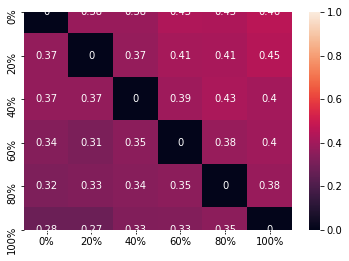

In [21]:
labels = [f"{label}%" for label in range(0, 101, 20)]
ax = seaborn.heatmap(wins, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)

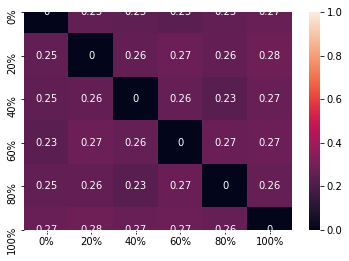

In [22]:
ax = seaborn.heatmap(draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)

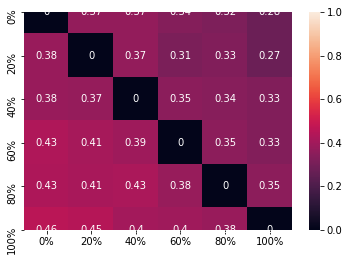

In [25]:
ax = seaborn.heatmap(losses, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)